In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

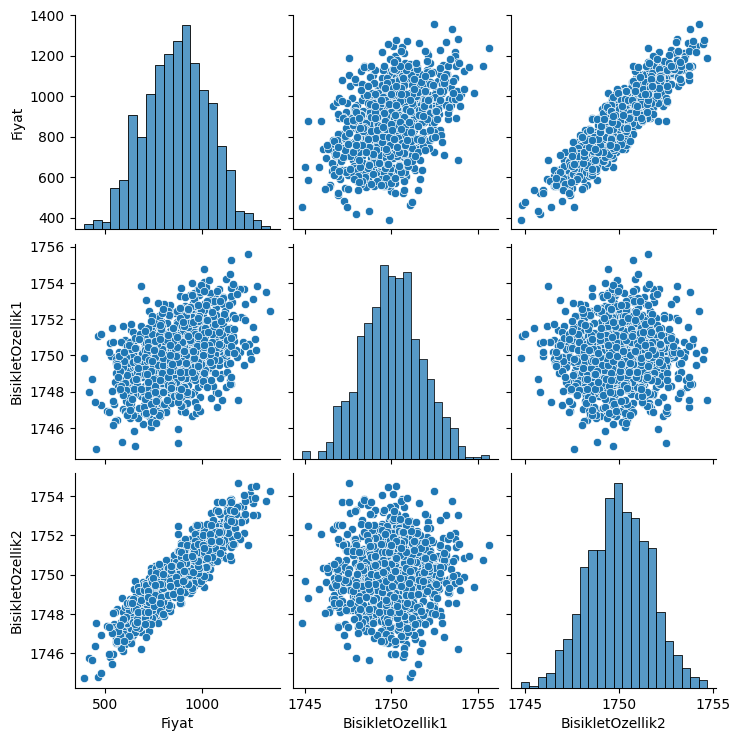

In [5]:
sbn.pairplot(dataFrame)

## veriyi test/train olarak ikiye ayırmak

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#train_test_split

In [8]:
# y = wx + b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [9]:
x_train.shape

(670, 2)

In [10]:
x_test.shape

(330, 2)

In [11]:
y_train.shape

(670,)

In [12]:
y_test.shape

(330,)

In [13]:
#scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(x_train)

MinMaxScaler()

In [17]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss = "mse")

In [22]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 787263.6250
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 789585.5625
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 799596.6250
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 793597.6875
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 786310.0000  
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 807517.4375
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 804172.1875
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 776901.5625
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 785159.1875
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 790973.0625  
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 797574.5625
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 777080.9375
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 782727.3125
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - los

In [23]:
loss = model.history.history["loss"]

<Axes: >

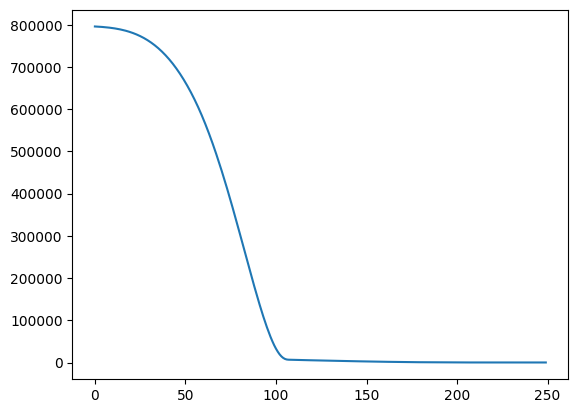

In [24]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [25]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [26]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [27]:
trainLoss

73.57830810546875

In [28]:
testLoss

81.1321029663086

In [29]:
testTahminleri = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


In [30]:
testTahminleri

array([[1077.578  ],
       [ 623.4583 ],
       [ 875.80023],
       [ 894.1089 ],
       [ 899.4024 ],
       [ 451.42084],
       [ 930.91113],
       [ 991.2519 ],
       [ 940.80365],
       [1016.55865],
       [ 750.5897 ],
       [ 917.4831 ],
       [ 947.3735 ],
       [1054.4459 ],
       [1121.1097 ],
       [ 681.2974 ],
       [1126.9128 ],
       [ 650.80084],
       [1154.5709 ],
       [ 886.24164],
       [ 892.55743],
       [ 716.3451 ],
       [ 480.03174],
       [ 611.87054],
       [ 834.64624],
       [1090.9249 ],
       [ 713.51917],
       [ 756.6453 ],
       [ 873.2993 ],
       [ 770.3725 ],
       [ 450.9937 ],
       [ 782.69257],
       [ 728.00226],
       [ 646.57135],
       [ 886.5046 ],
       [ 843.55304],
       [1035.4757 ],
       [1022.69354],
       [ 844.6054 ],
       [ 862.0094 ],
       [ 756.82495],
       [1174.4943 ],
       [1097.405  ],
       [1087.5845 ],
       [ 872.7351 ],
       [ 596.2764 ],
       [1145.7521 ],
       [ 973.

In [31]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [32]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [33]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [34]:
testTahminleri

0      1077.578003
1       623.458313
2       875.800232
3       894.108887
4       899.402405
          ...     
325    1013.287231
326     790.630310
327     765.601990
328    1167.349365
329     802.629883
Length: 330, dtype: float32

In [35]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [36]:
tahminDf

,Gerçek Y,0
0,1081.652164,1077.578003
1,622.675990,623.458313
2,889.356810,875.800232
3,902.826733,894.108887
4,897.662404,899.402405
...,...,...
325,1028.438035,1013.287231
326,789.934950,790.630310
327,758.490486,765.601990
328,1172.871659,1167.349365


In [37]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [38]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1077.578003
1,622.675990,623.458313
2,889.356810,875.800232
3,902.826733,894.108887
4,897.662404,899.402405
...,...,...
325,1028.438035,1013.287231
326,789.934950,790.630310
327,758.490486,765.601990
328,1172.871659,1167.349365


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

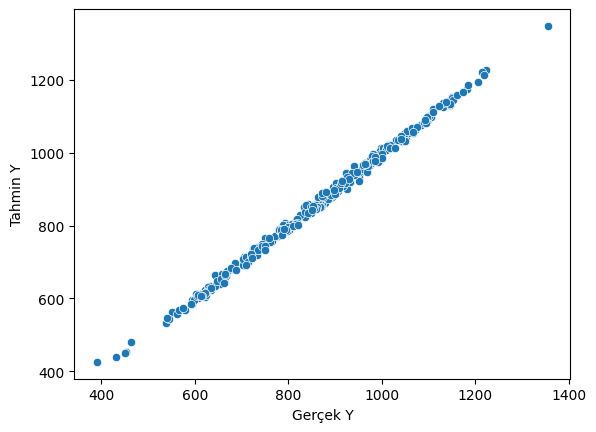

In [39]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

7.136367848439866

In [42]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

81.13210385238659

In [43]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [44]:
yeniBisikletOzellikleri = [[1751,1750]]

In [45]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [46]:
model.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[914.0842]], dtype=float32)

In [47]:
from tensorflow.keras.models import load_model
from keras.metrics import MeanSquaredError

In [48]:
model.save("bisiklet_modeli.h5")

In [49]:

# Use the correct string alias for the metric
sonradanCagirilanModel = load_model("bisiklet_modeli.h5", custom_objects={'mse': 'mean_squared_error'})


In [50]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[914.0842]], dtype=float32)